Start loading raw data.
Finish loading raw data.
Start filtering low-quality cells and SNPs.


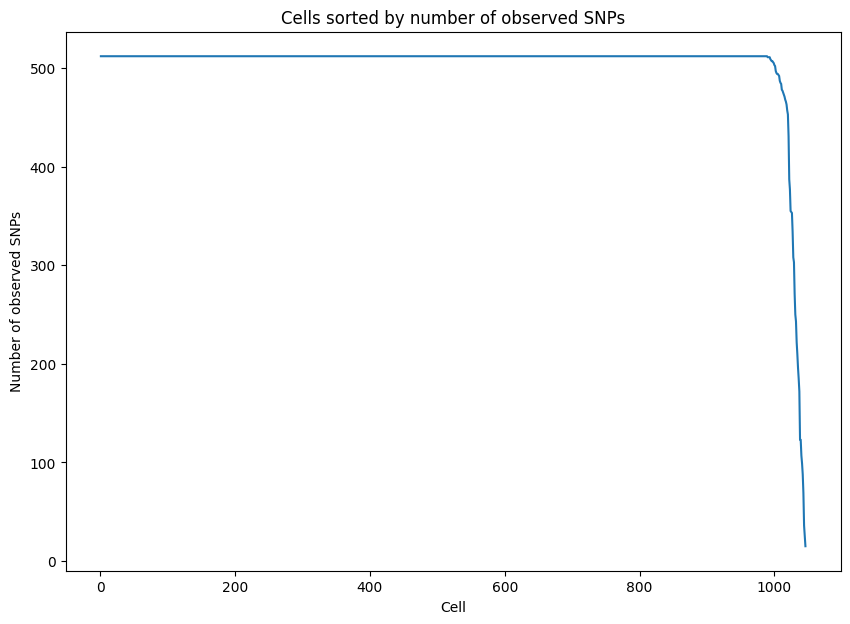

Please determine y-axis threshold in the plot to filter low-quality cells with low number of observed SNPs.   500


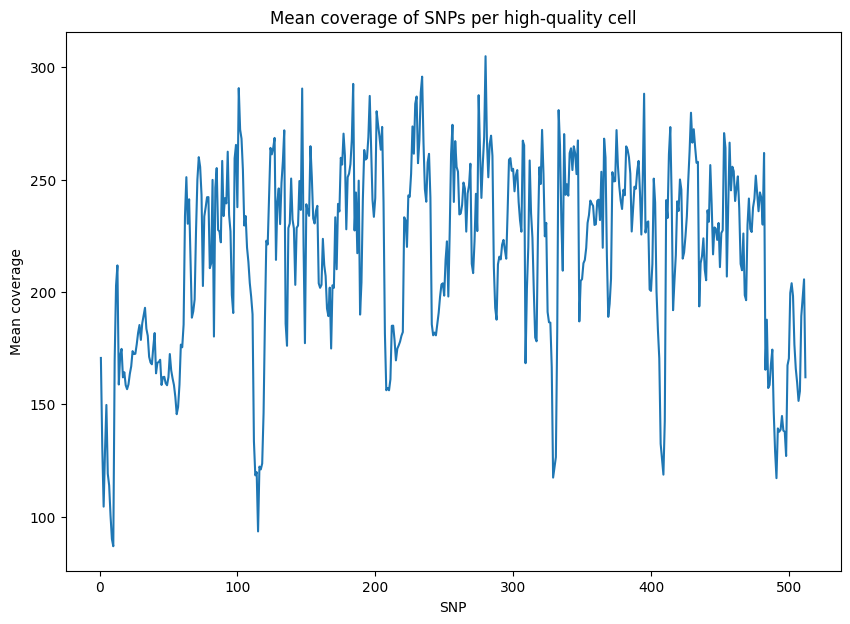

Please determine y-axis threshold in the plot to filter low-quality SNPs with low coverage.   0


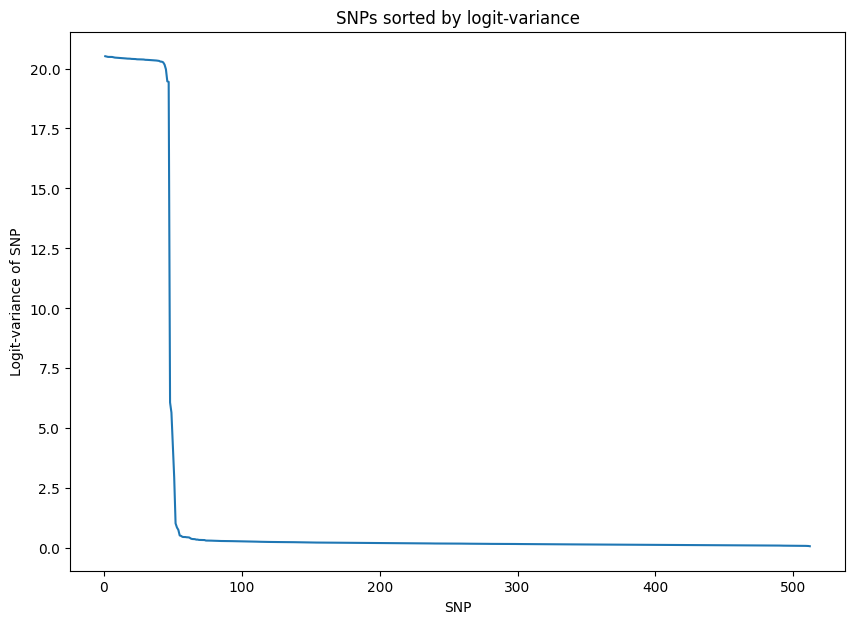

Please determine y-axis threshold in the plot to filter low-quality SNPs with low logit-variance.   0.5
Finish filtering low-quality data, 1001 cells and 56 SNPs will be used for downstream analysis.
Start training VAE.
Epoch[10/2000], Cost: 142.926712
Epoch[20/2000], Cost: 96.421097
Epoch[30/2000], Cost: 67.236969
Epoch[40/2000], Cost: 48.433250
Epoch[50/2000], Cost: 36.543995
Epoch[60/2000], Cost: 29.682175
Epoch[70/2000], Cost: 25.339907
Epoch[80/2000], Cost: 22.542070
Epoch[90/2000], Cost: 20.484669
Epoch[100/2000], Cost: 19.191113
Epoch[200/2000], Cost: 14.492204
Epoch[300/2000], Cost: 13.664025
Epoch[400/2000], Cost: 13.213725
Epoch[500/2000], Cost: 12.958460
Epoch[600/2000], Cost: 12.826440
Epoch[700/2000], Cost: 12.696223
Epoch[800/2000], Cost: 12.610480
Epoch[900/2000], Cost: 12.549658
Epoch[1000/2000], Cost: 12.466286
Epoch[1100/2000], Cost: 12.387312
Epoch[1200/2000], Cost: 12.328072
Epoch[1300/2000], Cost: 12.264229
Epoch[1400/2000], Cost: 12.212337
Epoch[1500/2000], Cost: 

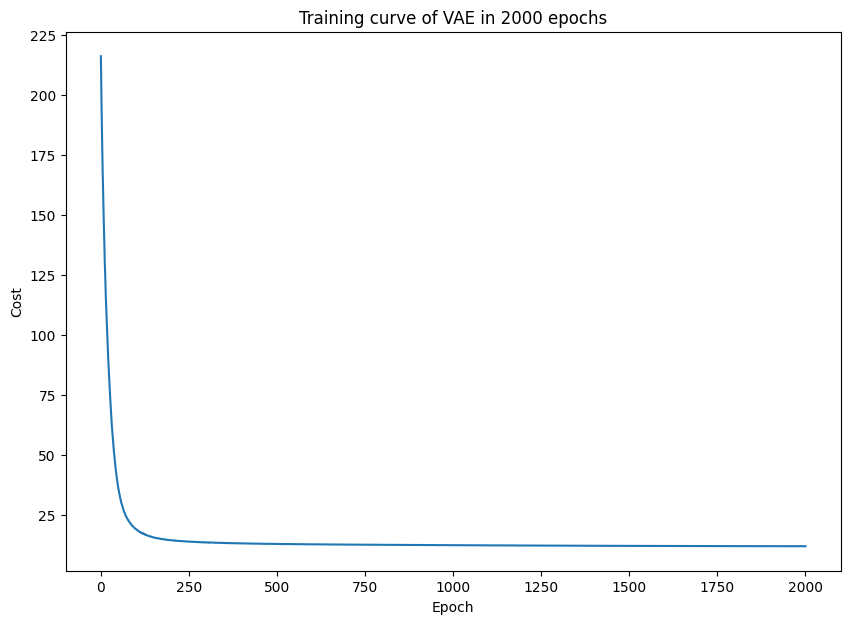

Start learning PCA and UMAP of latent space in VAE.
Finish learning, PCA and UMAP of latent space will be shown below.


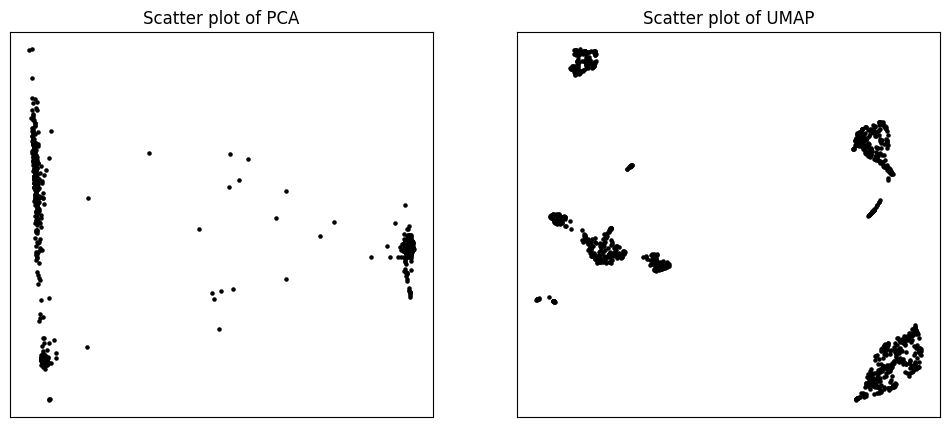

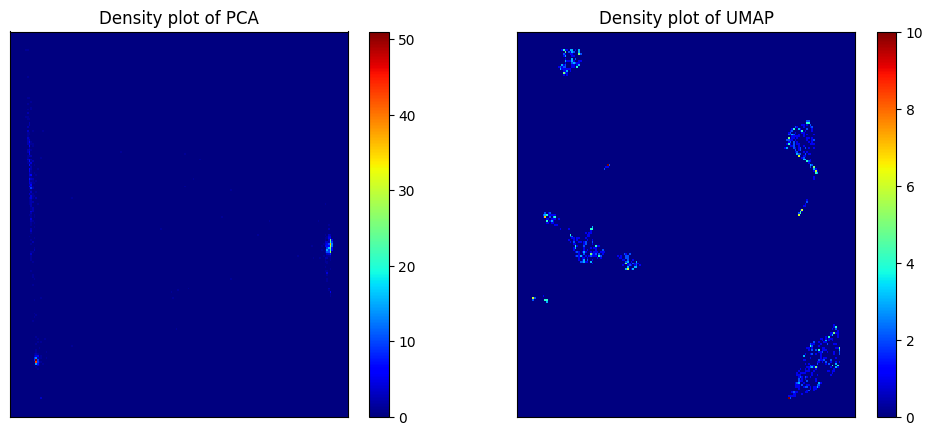

Start clustering.
Finish clustering.
PCA and UMAP of individual clusters will be shown below.


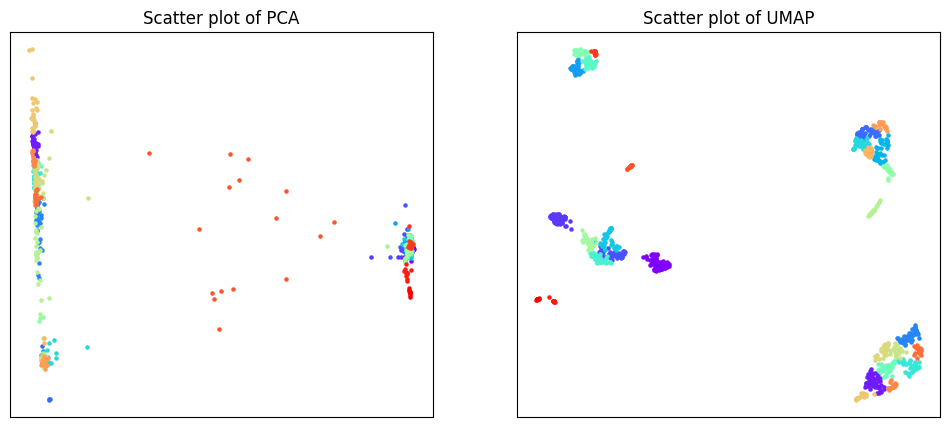

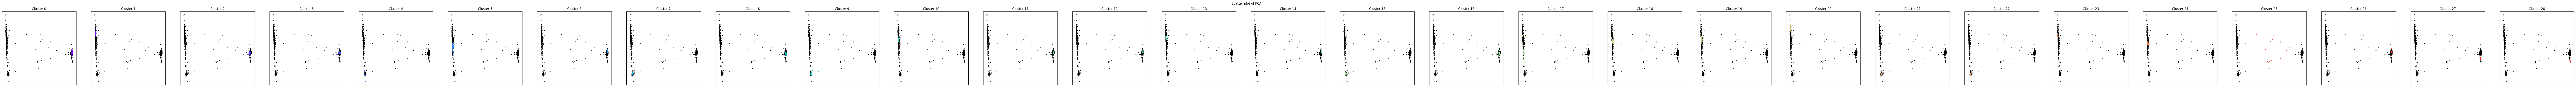

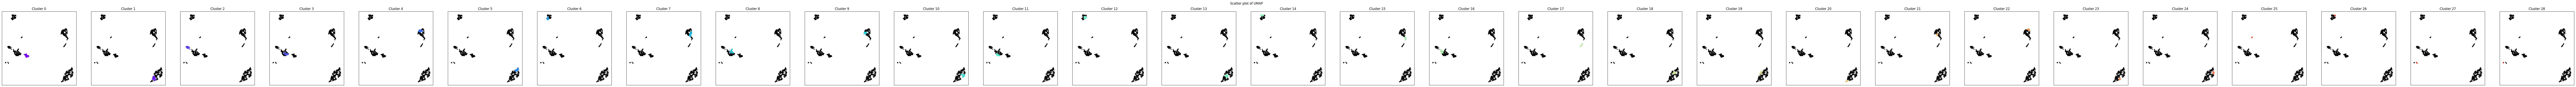

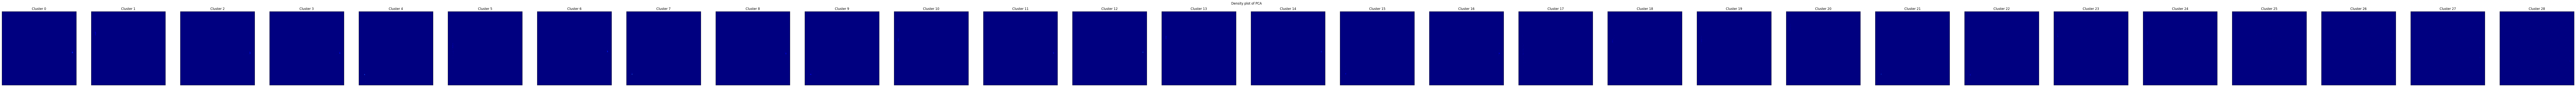

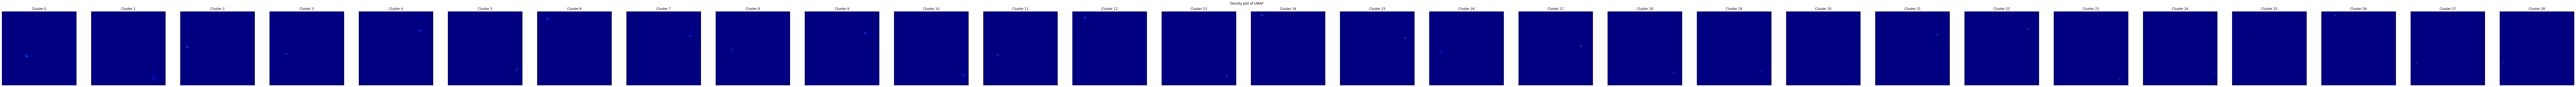

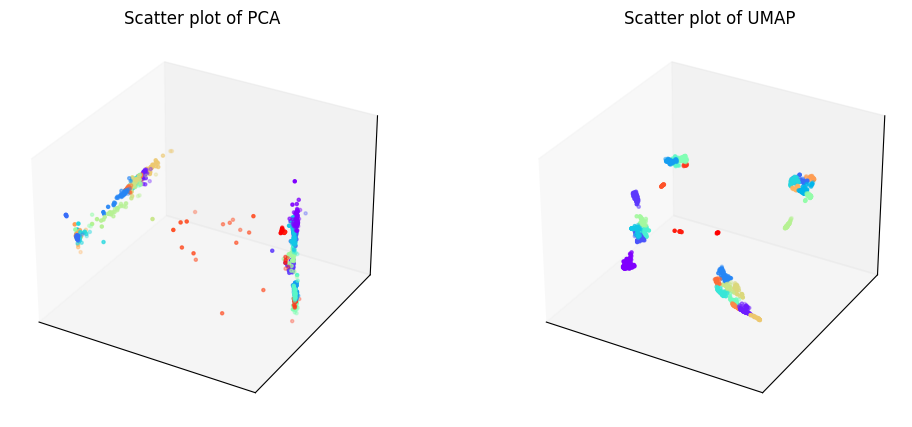

Phylogenetic tree in latent space will be shown below.


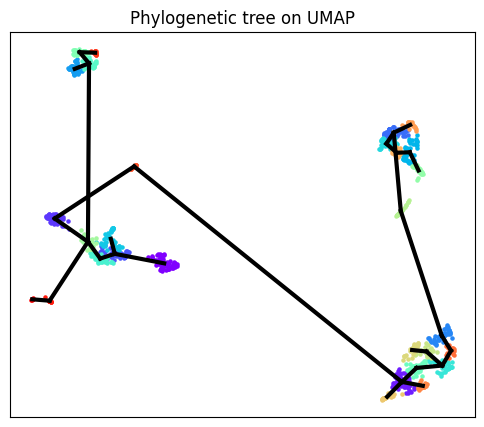

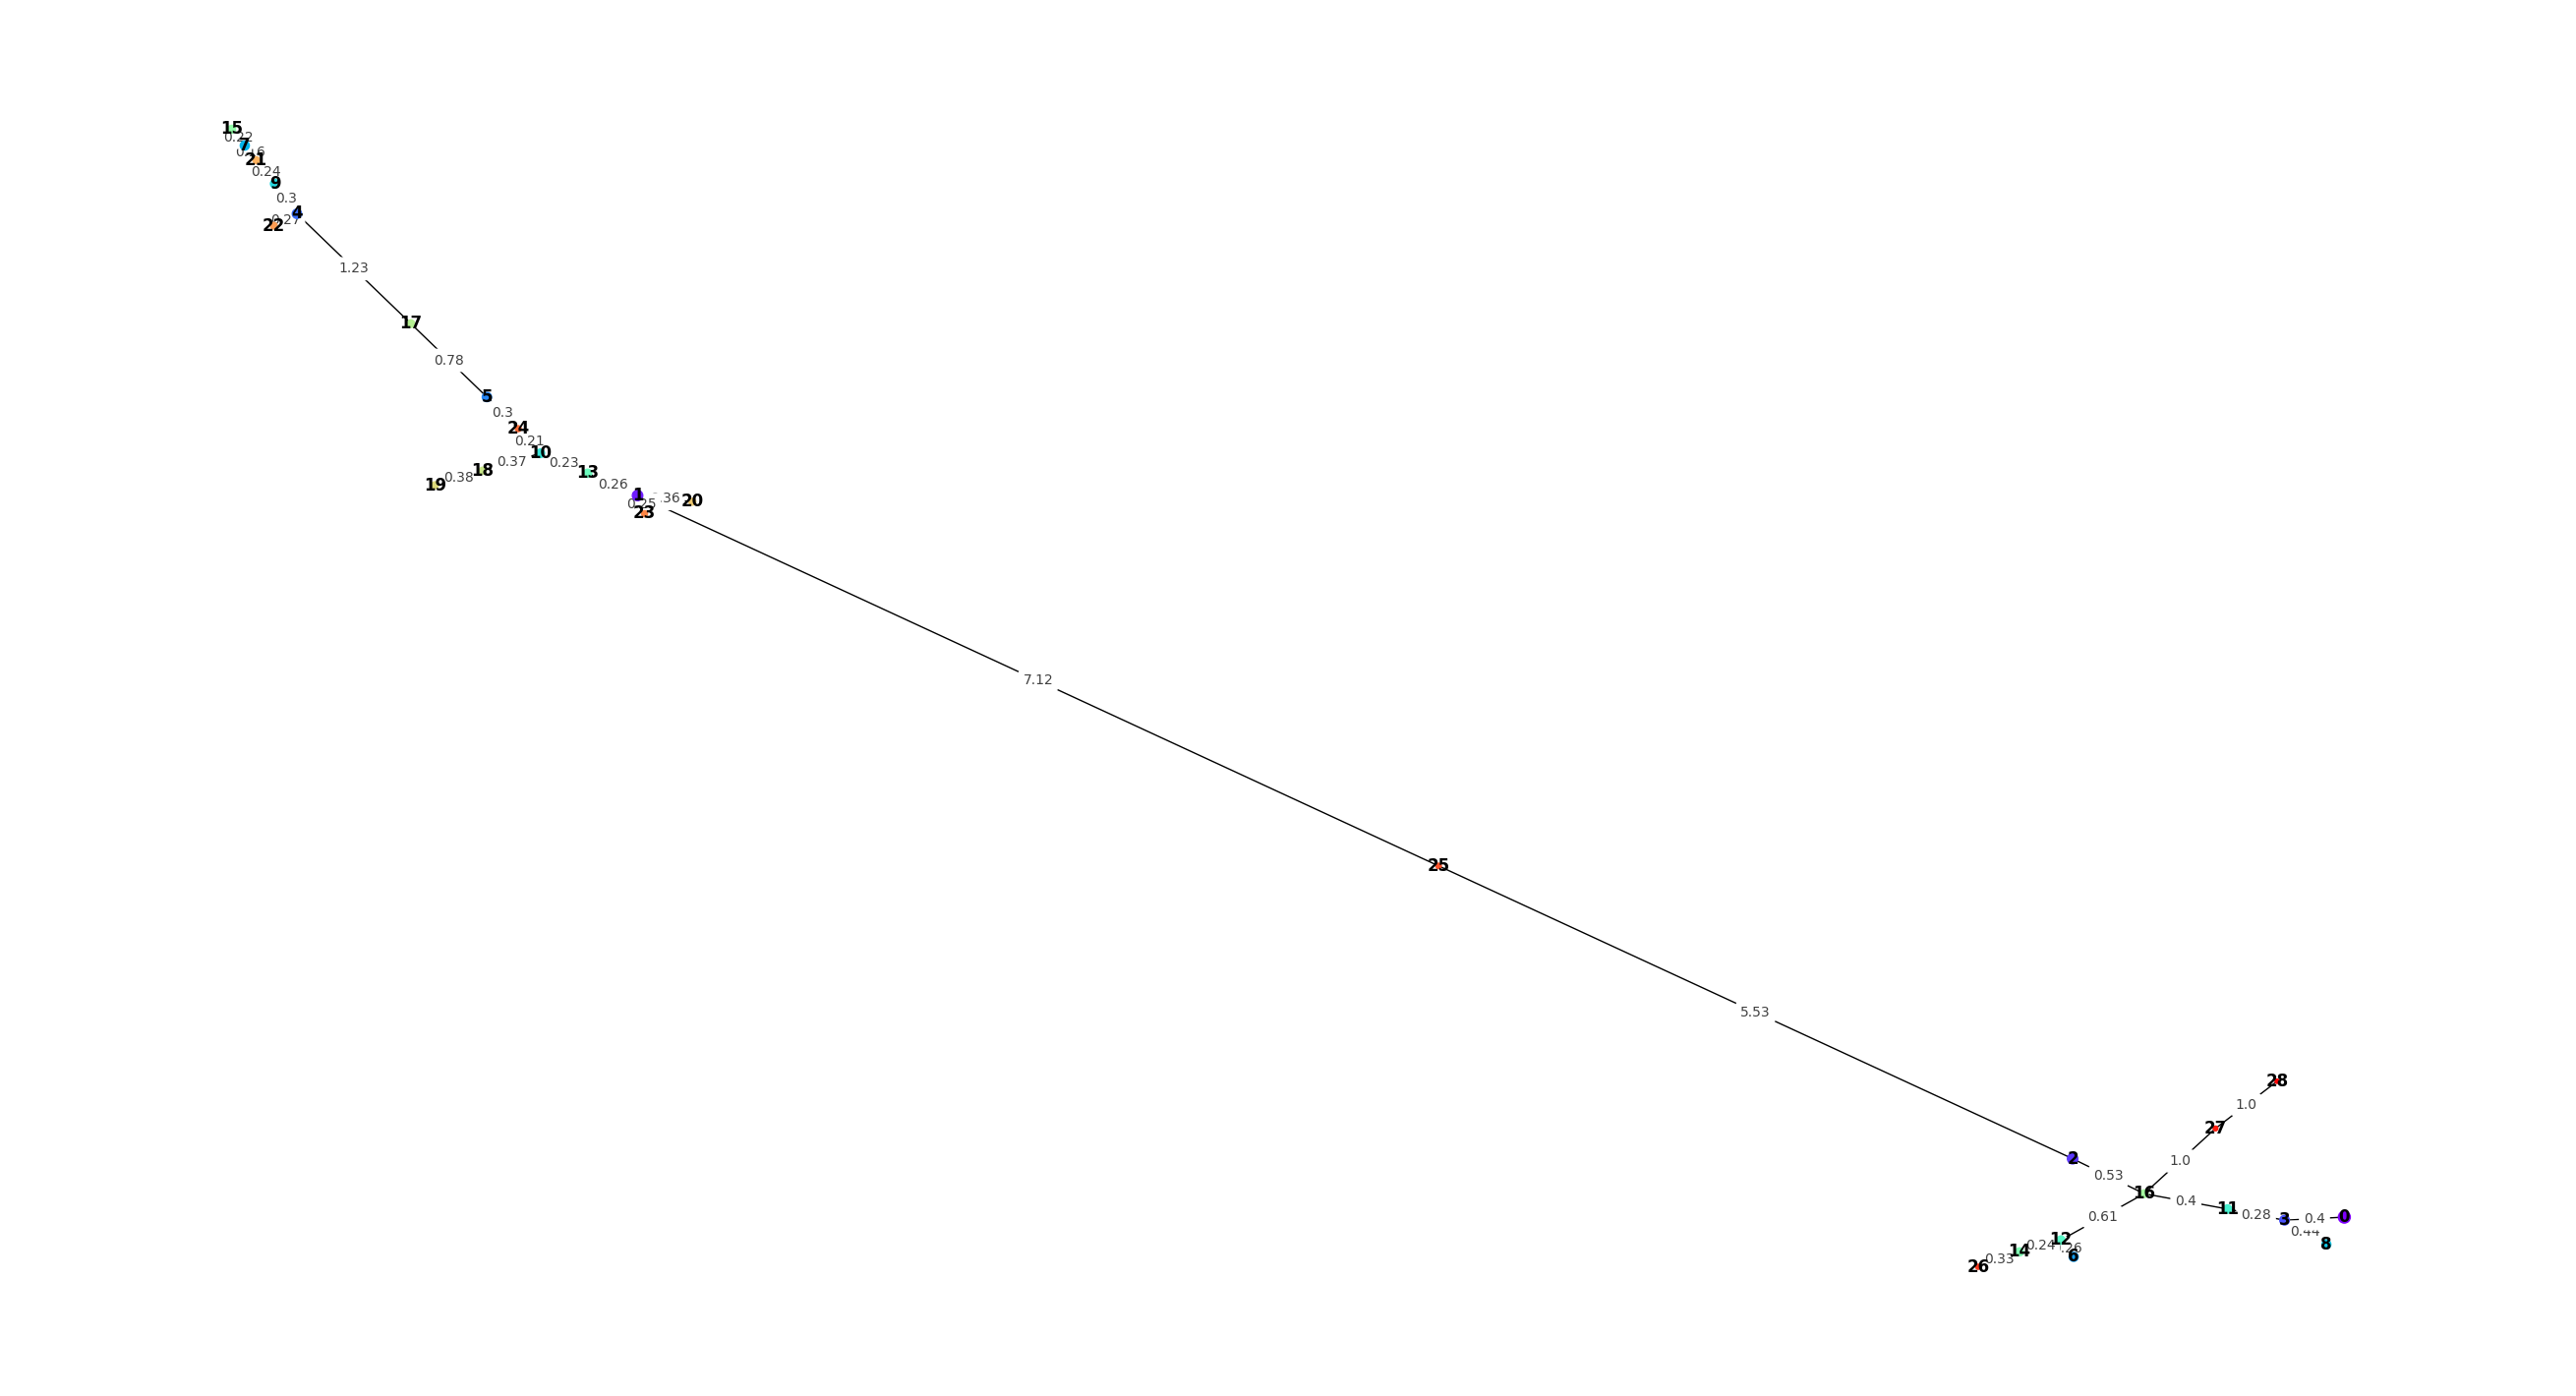

/tmp/ipykernel_3169601/2299804736.py:261: RuntimeWarning: divide by zero encountered in true_divide
  f_stat = np.clip(1 / ratio_logit_var, 1.001, 20)


SNP-allelic ratios of 1001 cells and 50 SNPs will be shown below.


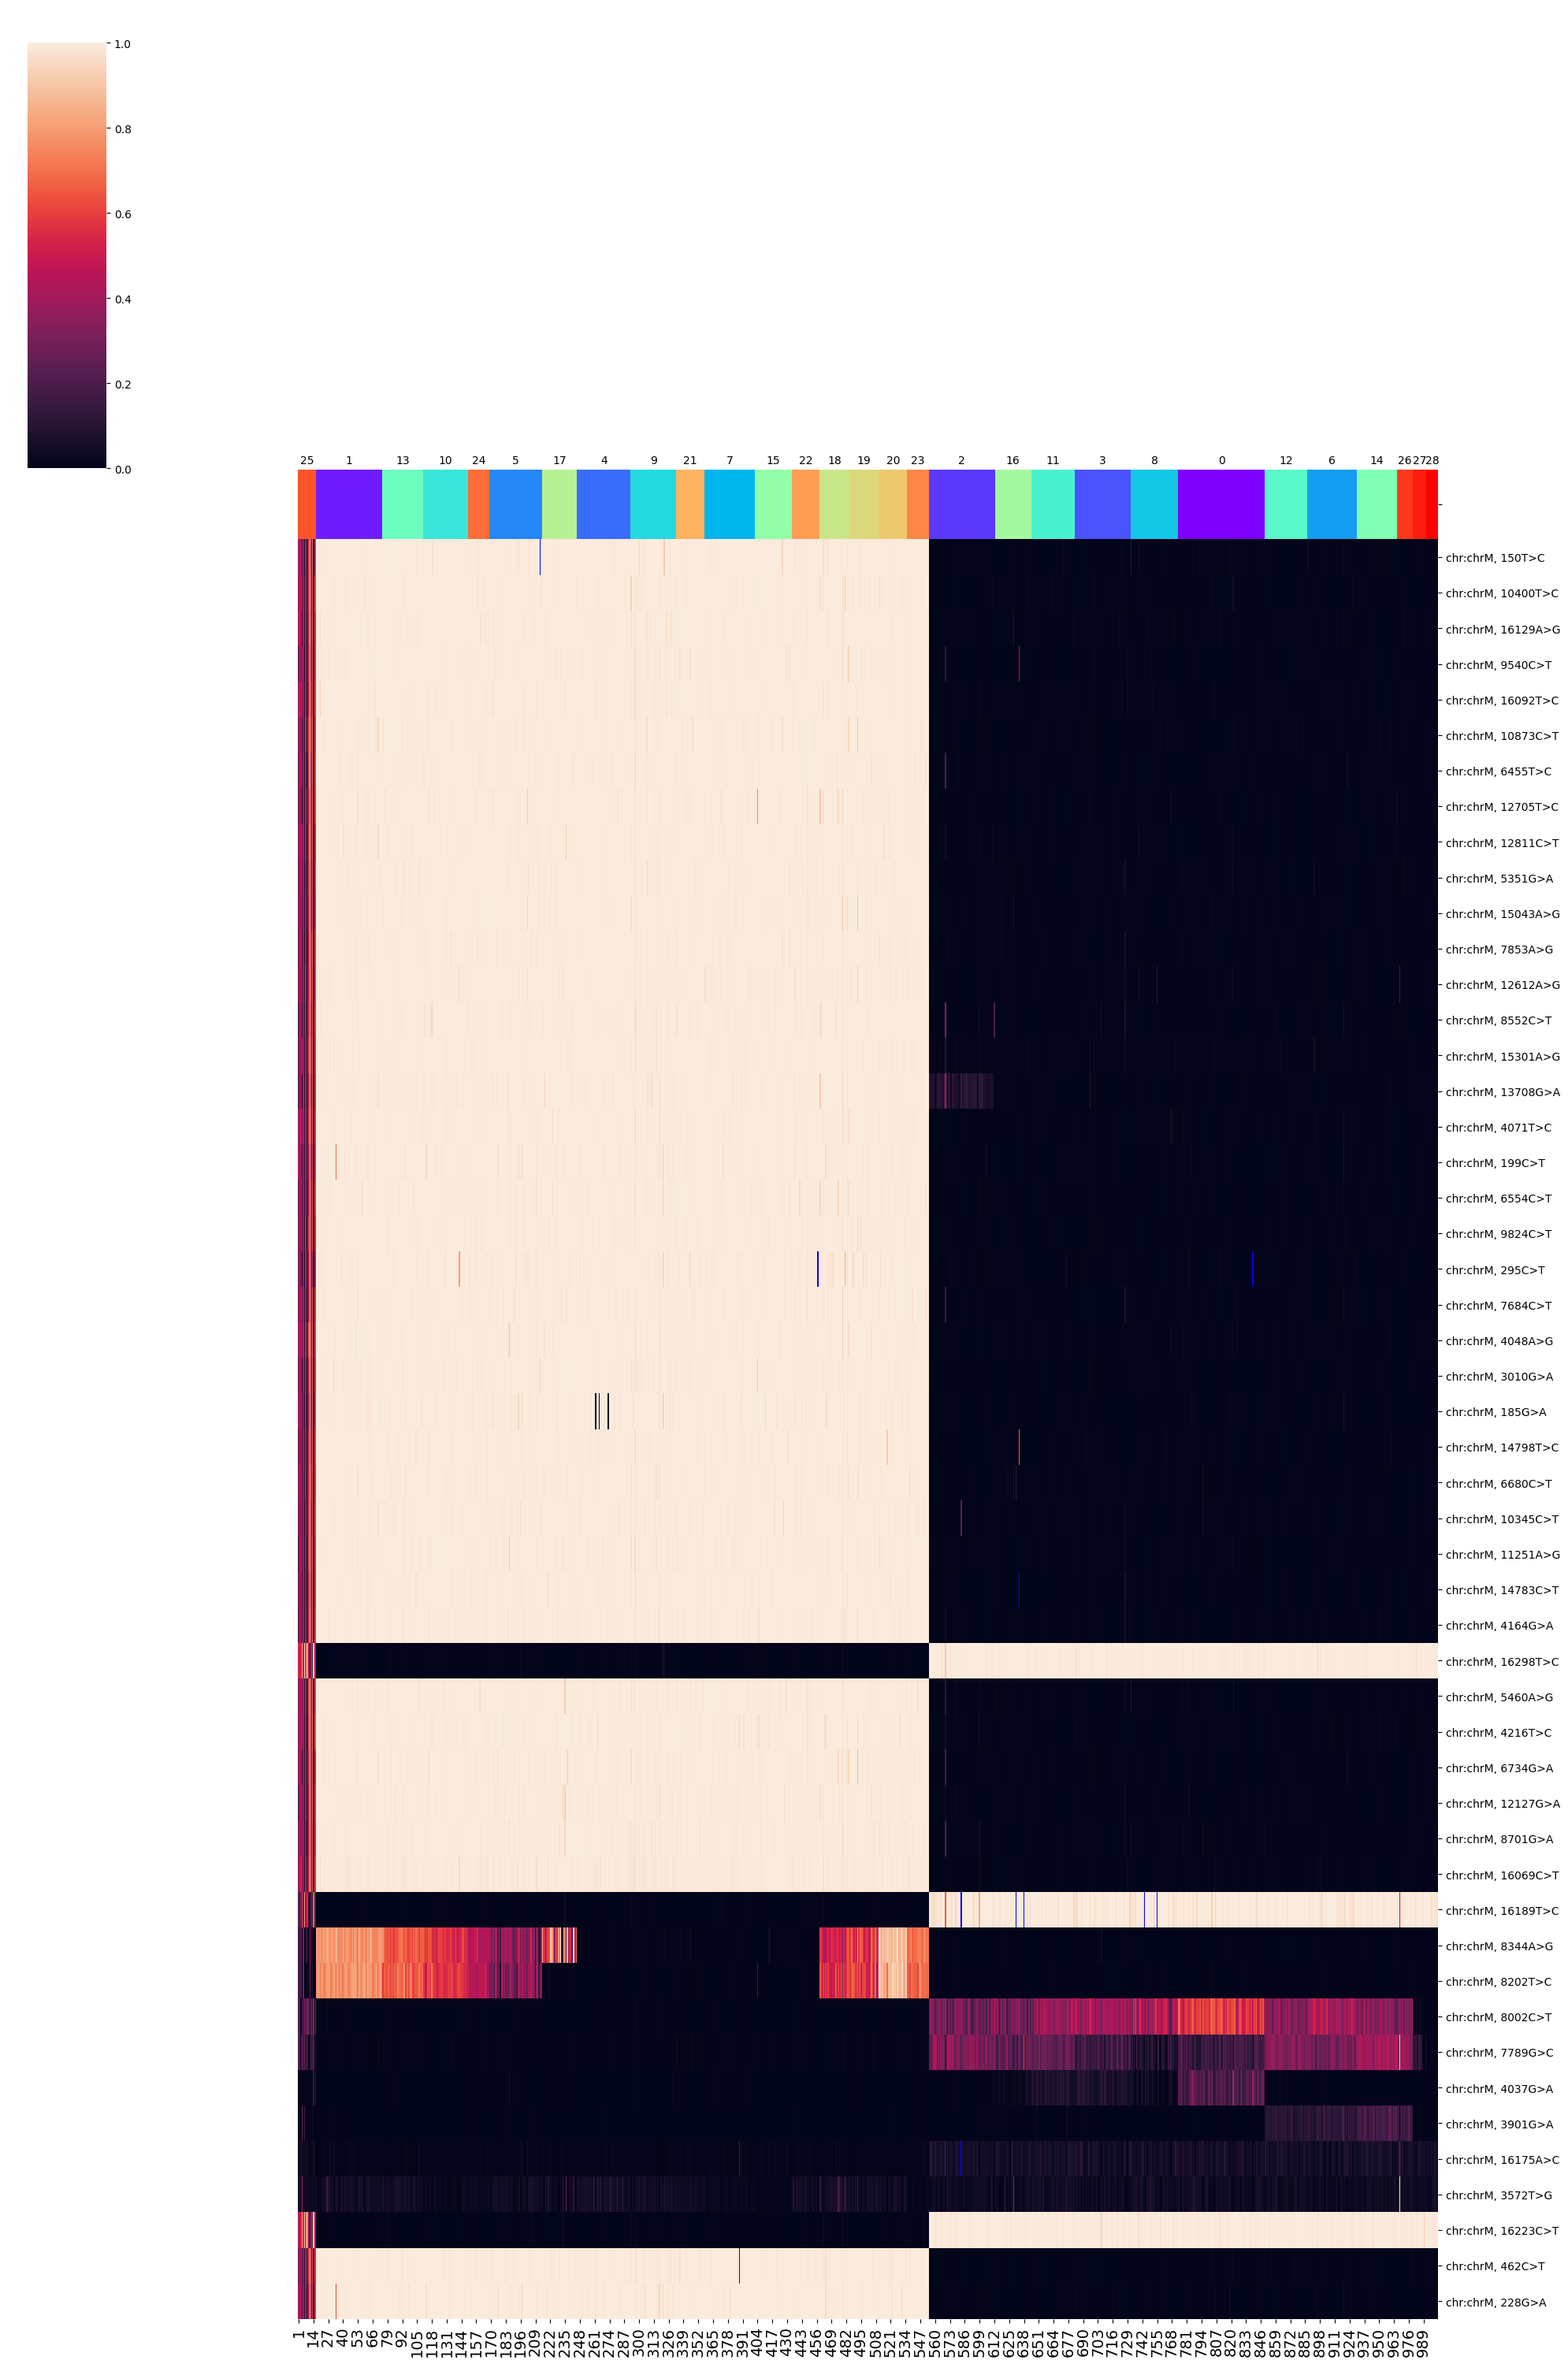

SNPs sorted by lowest p-value will be shown below


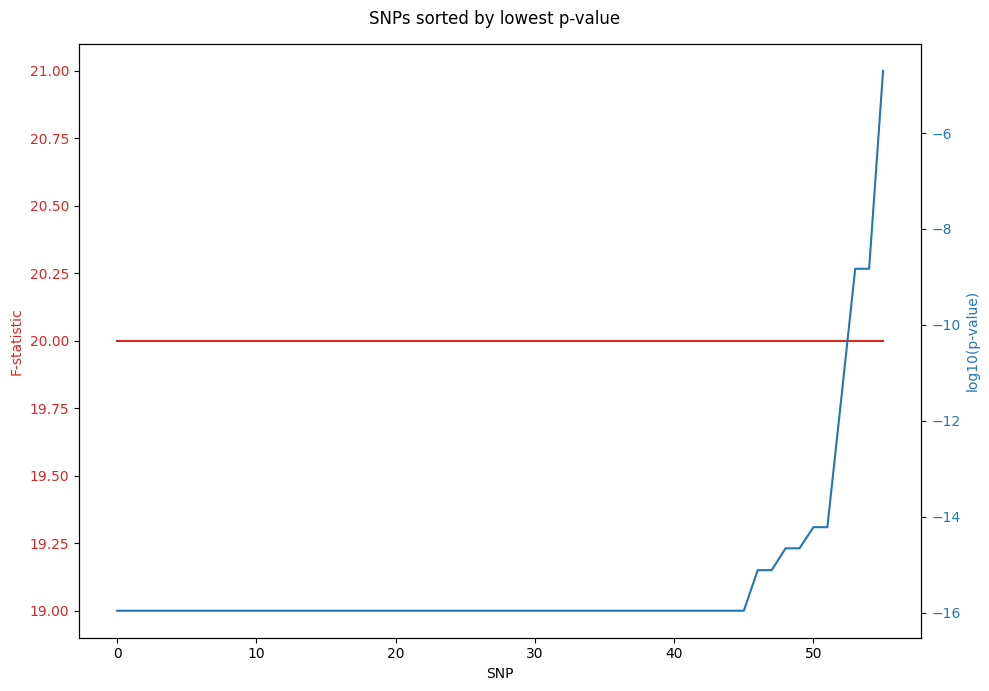

In [2]:
import torch
torch.set_default_device('cuda')
torch.cuda.set_device('cuda:4')

%run /home/kevin/storage_kevin/past_figures/figures_final7/notebook/SNPmanifold.ipynb

demo1 = SNP_VAE(path = "/home/kevin/storage_kevin/past_figures/figures_final7/data/TF1_GM11906")
demo1.filtering()
demo1.training()
demo1.clustering(algorithm = "leiden_umap3d")
demo1.phylogeny()

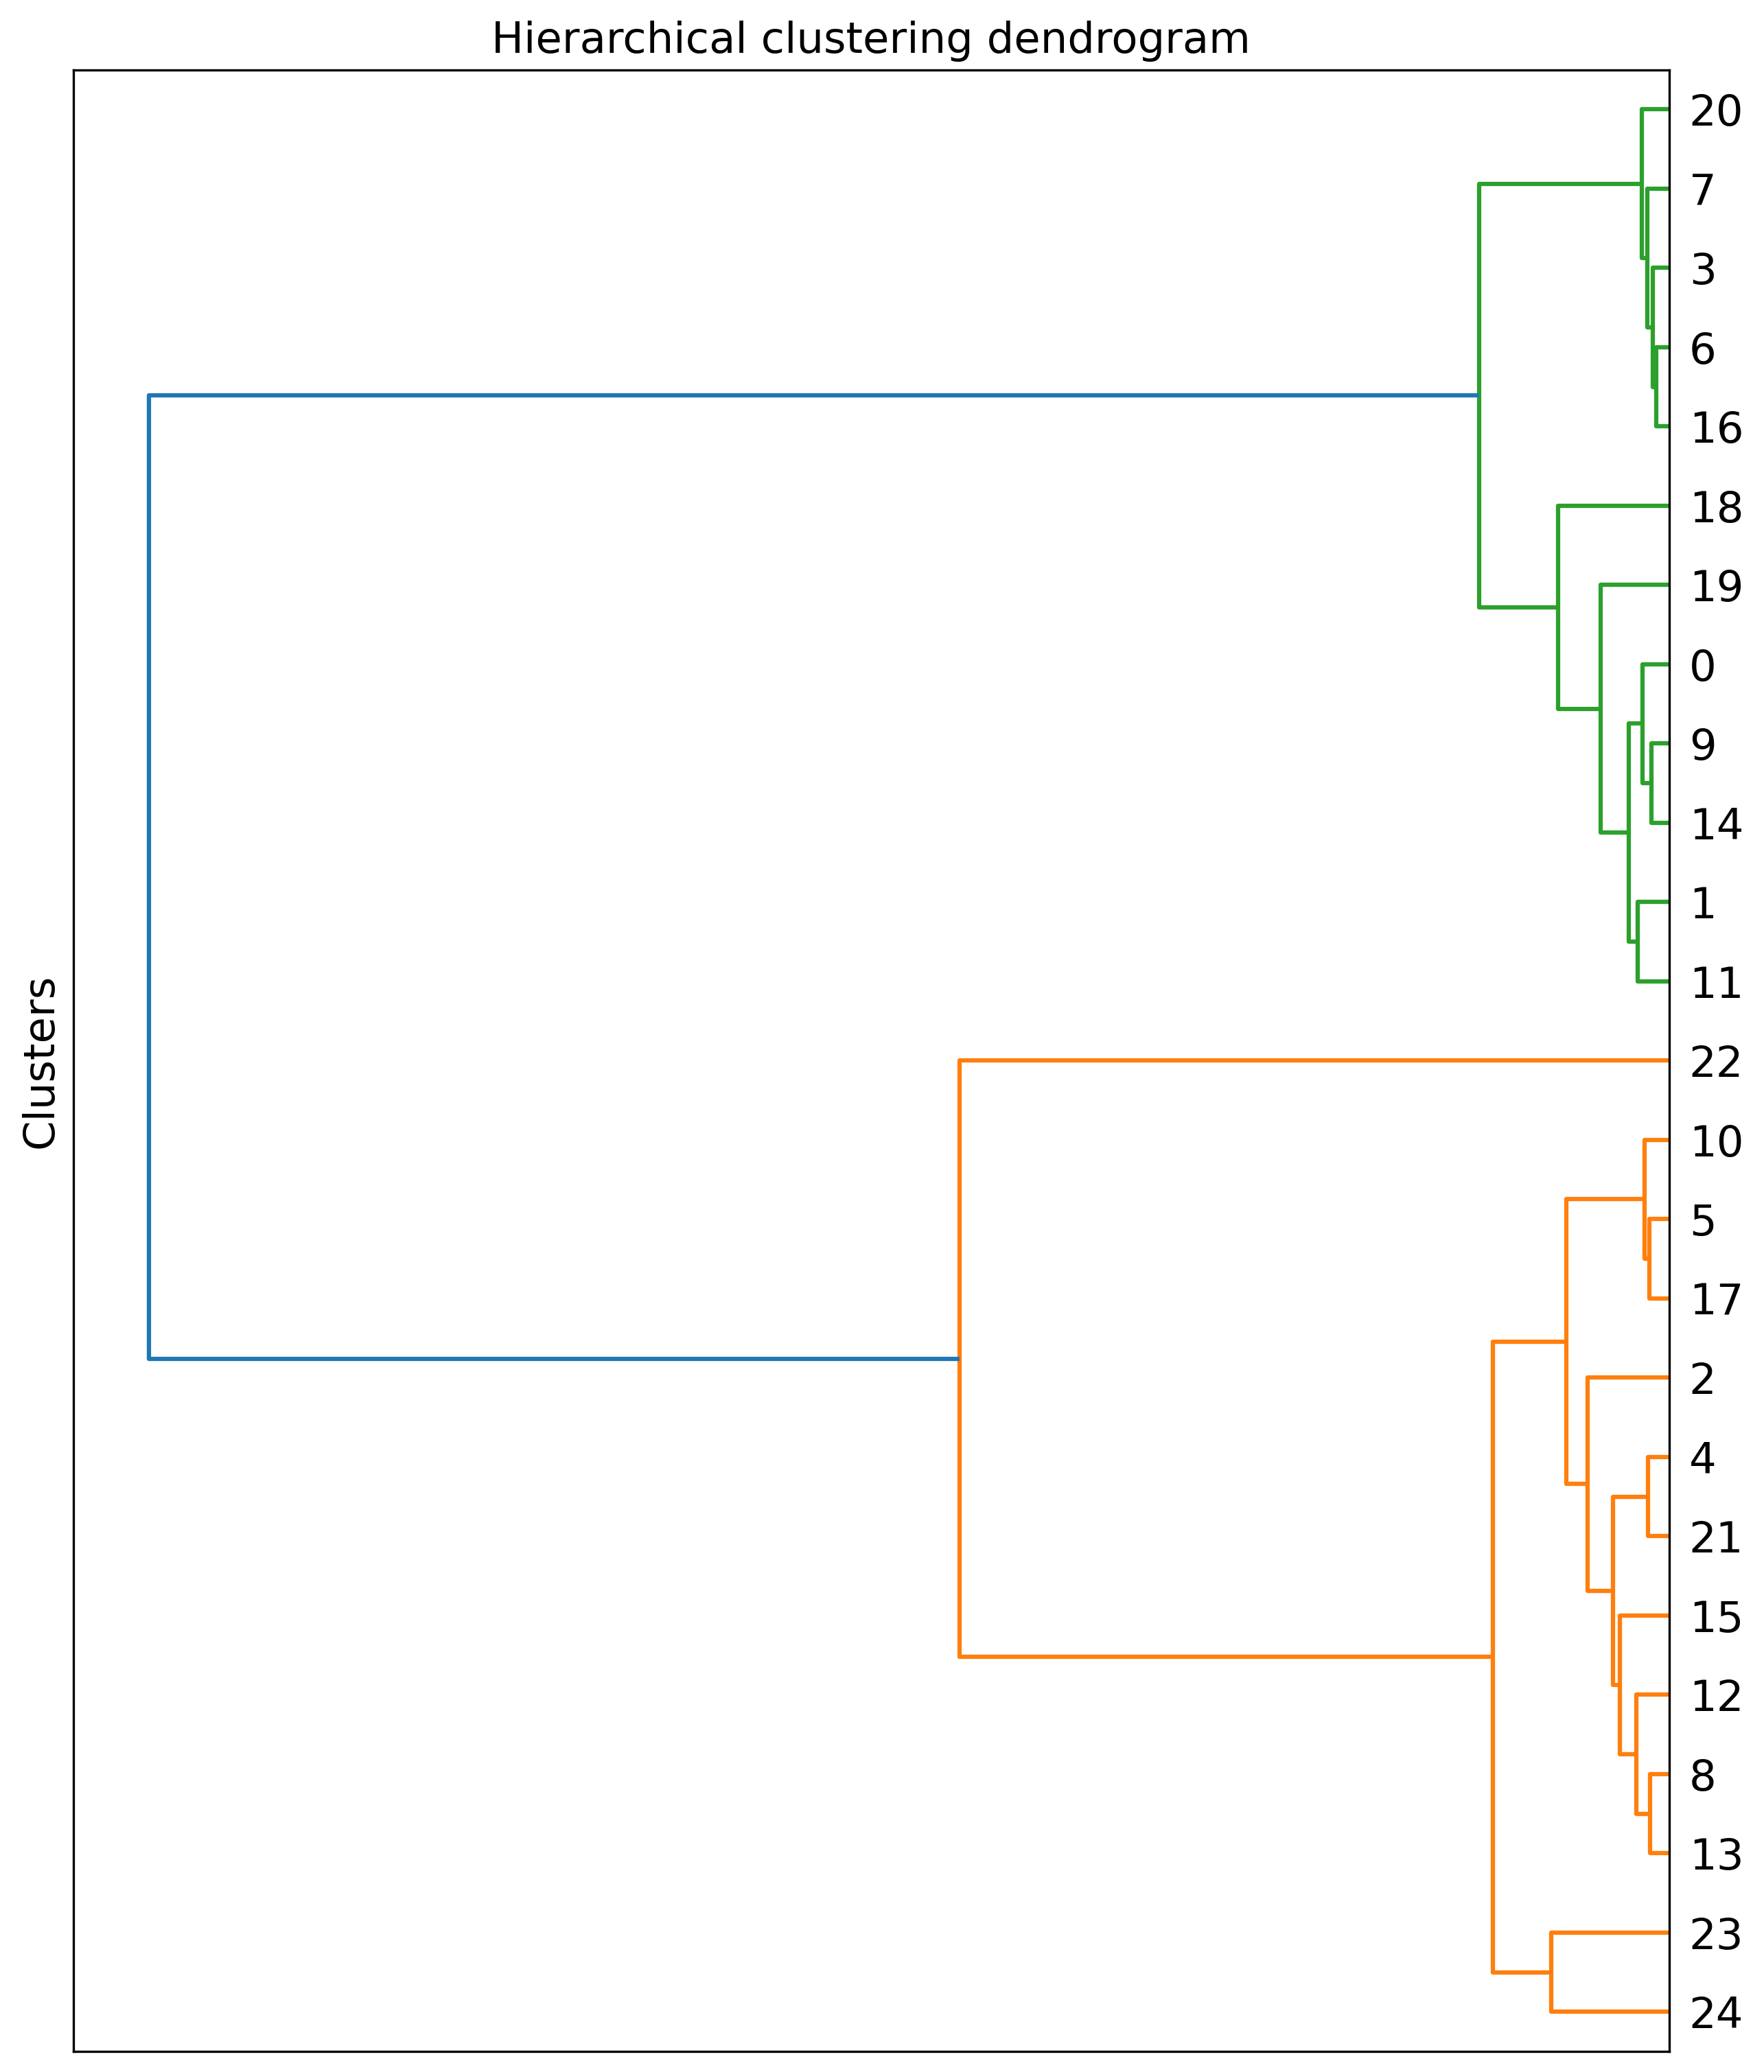

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram

assinged_label = np.genfromtxt("assigned_label.csv", delimiter=",").astype(int)

clusters = []

for w in range(np.max(assinged_label) + 1):
    
    clusters.append(np.where(assinged_label == w)[0])

centre_embedding_full = np.empty((np.max(assinged_label) + 1, demo1.latent.shape[1]))
    
for w in range(np.max(assinged_label) + 1):
    
    centre_embedding_full[w, :] = np.mean(demo1.latent[clusters[w], :], 0)

from scipy.cluster.hierarchy import linkage, dendrogram

bifur_tree = linkage(centre_embedding_full, method='average')

fig, axs = plt.subplots(1, 1, figsize=(10, ((np.max(assinged_label) + 1) * 0.5)))
fig.set_dpi(300)

dendrogram(bifur_tree, orientation='left', labels=np.arange((np.max(assinged_label) + 1).astype(int)).astype(int), distance_sort='descending', show_leaf_counts=True, leaf_font_size = 15)

axs.set_title('Hierarchical clustering dendrogram', fontsize = 15)
axs.set_xticks([])
axs.set_ylabel('Clusters', fontsize = 15)
plt.show()